State Space Analysis with TDA

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale = 1.5)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [9, 6]

With this we create our example time series, both with and without noise.

In [2]:
x = np.arange(0,1,.005)
y = x

z1 = np.cos(x*(10*np.pi))
z2 = .3*np.sin(x*(10*np.pi))

noise1 = np.random.rand(len(z1))
noise2 = np.random.rand(len(z1))

z1noise = z1 + (noise1-.5)*.3
z2noise = z2 + (noise2-.5)*.1

x_axis = np.arange(0, 1, 0.005)

z1bump = z1 - norm.pdf(x_axis,.2,.05)*.05
z2bump = z2 + norm.pdf(x_axis,.7,.05)*.05
z2bumpnoise = z2bump + noise2*.1


In the following code, we illustrate both the associated time series and the state space representations.

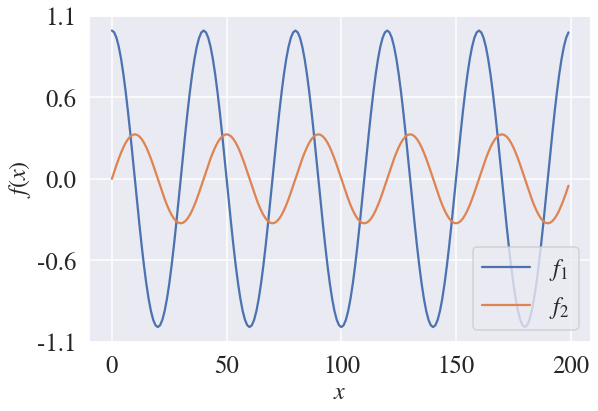

In [3]:
plt.figure()
plt.plot(z1,label = r"$f_1$")
plt.plot(z2, label = r"$f_2$")
plt.yticks(np.linspace(-1.1,1.1,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # 2 decimal places
plt.xlabel(r"$x$",fontsize=24)
plt.ylabel(r"$f(x)$",fontsize=24)
plt.legend(loc = "lower right",fontsize = 24)


(-1.5, 1.5)

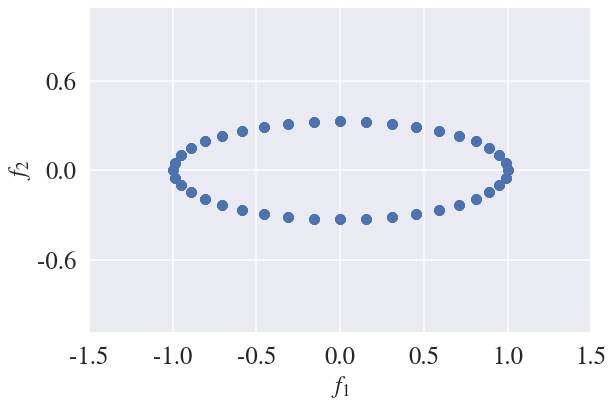

In [4]:
plt.figure()
plt.scatter(z1,z2)
plt.xlabel(r"$f_1$",fontsize=24)
plt.ylabel(r"$f_2$",fontsize=24)
plt.yticks(np.linspace(-1.1,1.1,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.ylim(-1,1)
plt.xlim(-1.5,1.5)



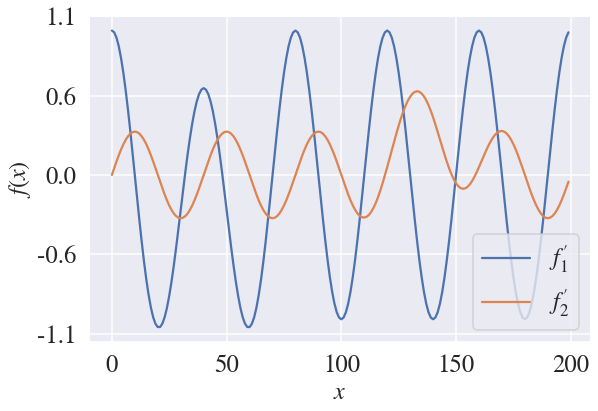

In [5]:
plt.figure()
plt.plot(z1bump,label = r"$f_1'$")
plt.plot(z2bump, label = r"$f_2'$")
plt.xlabel(r"$x$",fontsize=24)
plt.ylabel(r"$f(x)$",fontsize=24)
plt.yticks(np.linspace(-1.1,1.1,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # 2 decimal places
plt.legend(loc = "lower right",fontsize = 24)


(-1.5, 1.5)

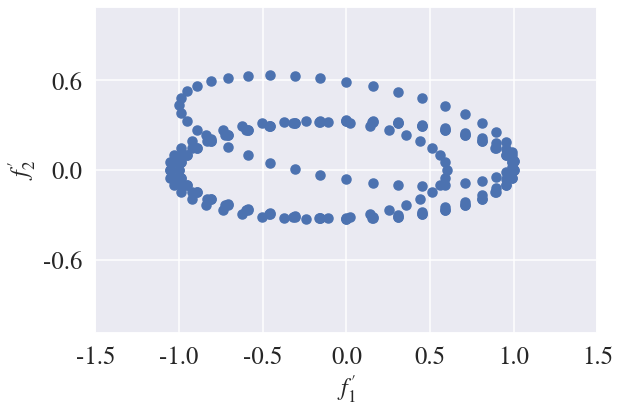

In [6]:
plt.figure()
plt.scatter(z1bump,z2bump)
plt.xlabel(r"$f_1'$",fontsize=24)
plt.ylabel(r"$f_2'$",fontsize=24)
plt.yticks(np.linspace(-1.1,1.1,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.ylim(-1,1)
plt.xlim(-1.5,1.5)


(-1.5, 1.5)

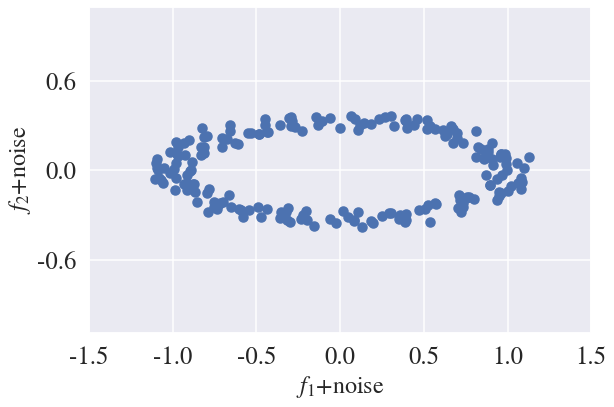

In [7]:
plt.figure()
plt.scatter(z1noise,z2noise)
plt.xlabel(r"$f_1$+noise",fontsize=24)
plt.ylabel(r"$f_2$+noise",fontsize=24)
plt.yticks(np.linspace(-1.1,1.1,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.ylim(-1,1)
plt.xlim(-1.5,1.5)


We now perform the persistence diagram analysis for the previously represented phase spaces using Gudhi.

In [8]:
import gudhi as gd


#Create the phase space point representation
points1 = np.vstack([z1,z2])
points2 = np.vstack([z1bump,z2bump])
points3 = np.vstack([z1noise,z2noise])

#Perform a rips filtration and obtain the associated filtered complex
rcomp1 = gd.RipsComplex(points1.T)
rcomp2 = gd.RipsComplex(points2.T)
rcomp3 = gd.RipsComplex(points3.T)

#Create the simplex tree data representation
simplex_tree1 = rcomp1.create_simplex_tree(max_dimension=2)
simplex_tree2 = rcomp2.create_simplex_tree(max_dimension=2)
simplex_tree3 = rcomp3.create_simplex_tree(max_dimension=2)

#Perform the persistence analysis on the simplex tree
a = simplex_tree1.persistence()
b = simplex_tree2.persistence()
c = simplex_tree3.persistence()

ModuleNotFoundError: No module named 'gudhi'

Plot the associated persistence diagrams

In [ ]:
matplotlib.rcParams['font.size'] = 14

plt.figure()
gd.plot_persistence_diagram(a,legend = True)
#plt.grid(True,ls = '--')
#plt.yticks(np.linspace(-.01,.7,num=5))
#plt.xticks(np.linspace(-.01,.7,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.xlabel(r"Birth",fontsize=24)
plt.ylabel(r"Death",fontsize=24)
plt.title("")
plt.savefig("fig7.eps",bbox_inches='tight')
plt.savefig("fig7.svg",bbox_inches='tight')

In [ ]:

plt.figure()
gd.plot_persistence_diagram(b,legend = True)
#plt.grid(True,ls = '--')
#plt.yticks(np.linspace(-.01,.4,num=5))
#plt.xticks(np.linspace(-.01,.4,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.xlabel(r"Birth",fontsize=24)
plt.ylabel(r"Death",fontsize=24)
plt.title("")
plt.savefig("fig8.eps",bbox_inches='tight')
plt.savefig("fig8.svg",bbox_inches='tight')


In [ ]:

plt.figure()
gd.plot_persistence_diagram(c,legend = True)
#plt.grid(True,ls = '--')
#plt.yticks(np.linspace(-.01,.6,num=5))
#plt.xticks(np.linspace(-.01,.6,num=5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.xlabel(r"Birth",fontsize=24)
plt.ylabel(r"Death",fontsize=24)
plt.title("")
plt.savefig("fig9.eps",bbox_inches='tight')
plt.savefig("fig9.svg",bbox_inches='tight')
